**6. 어떤 무선 청소기가 인기가 좋을까?**

**데이터 수집**

In [ ]:
# 검색 결과 웹 페이지의 URL: https://prod.danawa.com/list/?cate=102207&shortcutKeyword=무선청소
# selenium으로 크롬 브라우저를 생성하고 '무선 청소기'에 대한 다나와 검색 결과 페이지 URL로 접속

# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Selenium 설치 & 내 구글 드라이브에 chromedriver 설치**

In [ ]:
!pip install selenium
!apt-get update

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [908 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [

In [ ]:
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver '/content/drive/MyDrive/Colab Notebooks' #
!pip install chromedriver-autoinstaller

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  apparmor chromium-browser libfuse3-3 liblzo2-2 libudev1 snapd squashfs-tools systemd-hwe-hwdb
  udev
Suggested packages:
  apparmor-profiles-extra apparmor-utils fuse3 zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver libfuse3-3 liblzo2-2 snapd squashfs-tools
  systemd-hwe-hwdb udev
The following packages will be upgraded:
  libudev1
1 upgraded, 9 newly installed, 0 to remove and 69 not upgraded.
Need to get 28.5 MB of archives.
After this operation, 118 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 apparmor amd64 3.0.4-2ubuntu2.3 [595 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 liblzo2-2 amd64 2.10-2build3 [53.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 squashfs-tools amd64 1:4.5-3

In [ ]:
!python --version

import selenium
print(selenium.__version__)

Python 3.10.12
4.31.1


**라이브러리 임포트**

In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import sys
from selenium.webdriver.common.keys import Keys
import urllib.request
import os
from urllib.request import urlretrieve

import time
import pandas as pd
import chromedriver_autoinstaller  # setup chrome options

**chrome_options 설정**

In [ ]:
chrome_path = "/content/drive/MyDrive/Colab Notebooks/chromedriver"

In [ ]:
sys.path.insert(0,chrome_path)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')  # set path to chromedriver as per your configuration
chrome_options.add_argument('lang=ko_KR') # 한국어

chromedriver_autoinstaller.install()  # set the target URL

In [ ]:
driver = webdriver.Chrome(options=chrome_options)

In [ ]:
url='https://prod.danawa.com/list/?cate=102207&shortcutKeyword=무선청소'
driver.get(url)

**다나와 검색 웹 페이지에서 상품 정보 가져오기**

In [ ]:
# 데이터를 수집하기에 앞서 다나와 상품 검색 페이지를 살펴보겠습니다.
# 상품 검색 결과가 여러 페이지에 걸쳐 있으며, 각 페이지에 동일한 형식으로 상품이 표시됩니다.

# 검색 결과의 1페이지에 나온 30개의 상품 정보를 수집.

**웹 페이지의 HTML 정보 가져오기**

In [ ]:
from bs4 import BeautifulSoup
html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

# 검색 결과의 1페이지를 구성하는 HTML 정보를 가져와 BeautifulSoup으로 읽습니다.

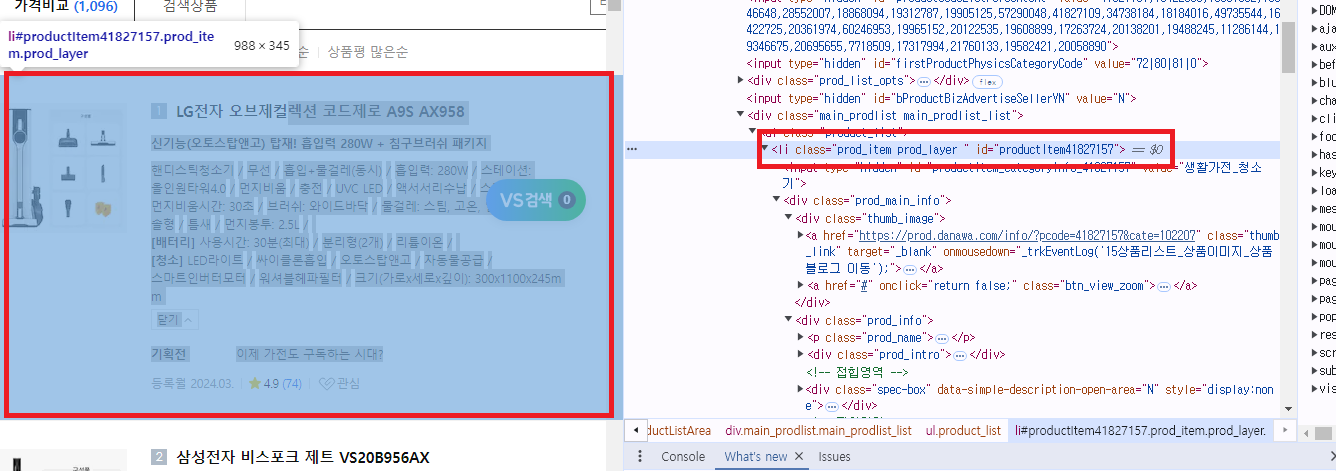

In [ ]:
prod_items=soup.select('li.prod_item')
len(prod_items)

# <li class="prod_item prod_layer" id="productItem41827157>"

31

**1페이지에 대한 무선청소기 정보 가져오기**

In [ ]:
# 현재 페이지에서 우리가 찾고자 하는 상품의 개수는 30개인데, 앞서 검색한 태그는
# 31개가 있는 것으로 나옵니다. 우리가 찾는 30개의 상품만 조회하도록 상위 태그 정보를 추가해서 검색.
prod_items=soup.select('ul.product_list > li.prod_item')
len(prod_items)

# <div class="main_prodlist main_prodlist_list>"
# <ul class="product_list">
# <li class="prod_item prod_layer" id="productItem41827157>"

31

In [ ]:
prod_items=soup.select('div.main_prodlist > ul.product_list > li.prod_item')
len(prod_items)

31

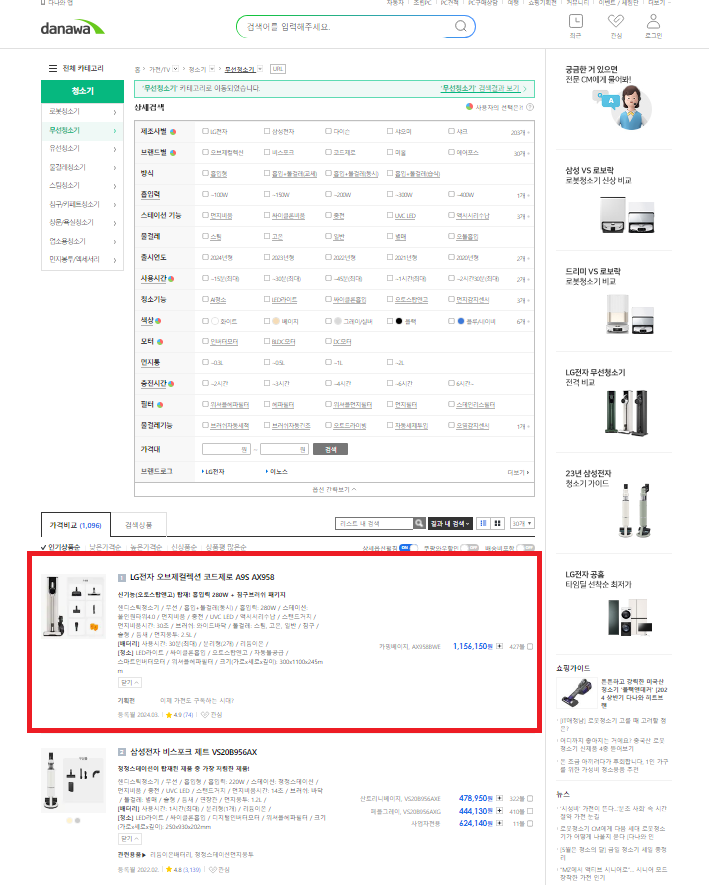

In [ ]:
print(prod_items[0])

# 1번째 상품의 정보가 들어 있는 것을 확인할 수 있습니다.
# 여러가지 상품 정보 중에서 우리가 수집하고자 하는 정보를 추출해보겠습니다.

<li class="prod_item prod_layer" id="productItem41827157">
<input id="productItem_categoryInfo_41827157" type="hidden" value="생활가전_청소기"/>
<div class="prod_main_info">
<div class="thumb_image">
<a class="thumb_link" href="https://prod.danawa.com/info/?pcode=41827157&amp;cate=102207" onmousedown="_trkEventLog('15상품리스트_상품이미지_상품블로그 이동');" target="_blank">
<img alt="LG전자 오브제컬렉션 코드제로 A9S AX958이미지입니다. 누르면 해당 게시물로 새창이동합니다." src="//img.danawa.com/prod_img/500000/157/827/img/41827157_1.jpg?shrink=130:130&amp;_v=20240509152909"/>
</a>
<a class="btn_view_zoom" href="#" onclick="return false;"><span class="ico i_zoom_vw"></span>이미지보기</a>
</div>
<div class="prod_info">
<p class="prod_name">
<strong class="pop_rank"><span class="screen_out">인기 순위</span>1</strong> <a href="https://prod.danawa.com/info/?pcode=41827157&amp;cate=102207" name="productName" onmousedown="_trkEventLog('15상품리스트_상품명')" target="_blank">
									LG전자 오브제컬렉션 코드제로 A9S AX958								</a>
<span class="head_ico_wrap" style="">
</span

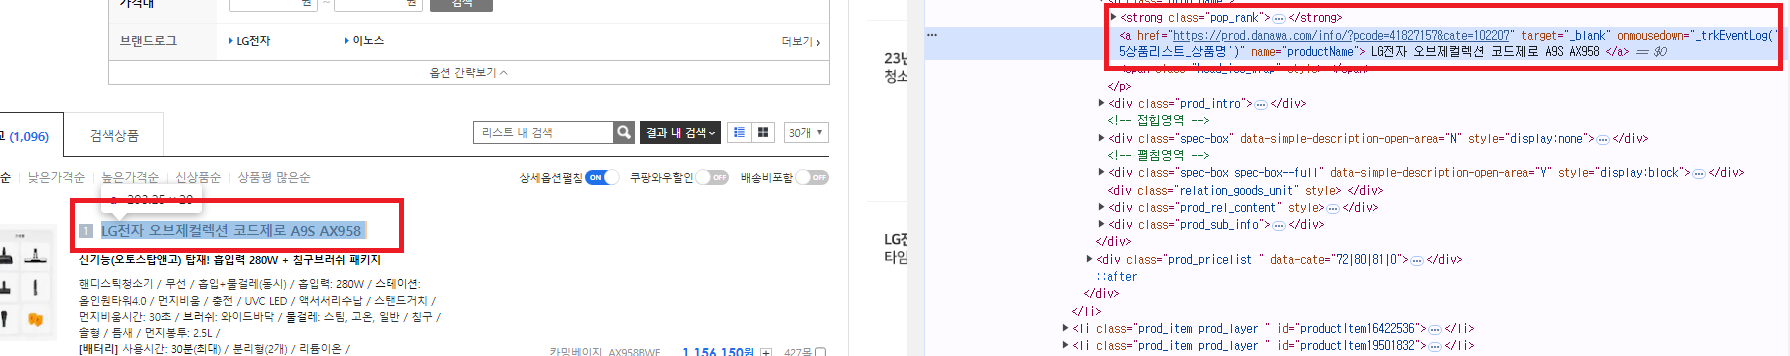

**상품명**

In [ ]:
# 상품명 가져오기: <p class="prod_name"> dkfodml <a> 태그에 상품명 정보가 들어있기 때문에
# select('p.prod_name > a')[0].text 명령으로 상품명을 가져올 수 있습니다.

# <p class="prod_name"
# <strong class="pop_rank"> ... </strong>

# <a href="https://prod.danawa.com/info/?pcode=41827157&amp;cate=102207" target="_blank" onmousedown="_trkEventLog('15상품리스트_상품명')"
# name="productName"> LG전자 오브제컬렉션 코드제로 A9S AX958								</a>

title=prod_items[0].select('p.prod_name>a')[0].text.strip()
print(title)

title1=prod_items[1].select('p.prod_name>a')[0].text.strip()
print(title1)

LG전자 오브제컬렉션 코드제로 A9S AX958
삼성전자 비스포크 제트 VS20B956AX


**스펙 목록**

In [ ]:
# 스펙 목록 가져오기
# <div class='spec_list'> 태그에 스펙 목록 정보가 들어있습니다.
spec_list=prod_items[0].select('div.spec_list')[0].text.strip()
print(spec_list)

spec_list1=prod_items[1].select('div.spec_list')[0].text.strip()
print(spec_list1)

핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 280W/스테이션: 올인원타워4.0/먼지비움/충전/UVC LED/액서서리수납/스탠드거치/먼지비움시간: 30초/브러쉬: 와이드바닥/물걸레: 스팀, 고온, 일반/침구/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 30분(최대)/분리형(2개)/리튬이온/[청소] LED라이트/싸이클론흡입/오토스탑앤고/자동물공급/스마트인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 300x1100x245mm
핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 청정스테이션/먼지비움/충전/UVC LED/스탠드거치/먼지비움시간: 14초/브러쉬: 바닥/물걸레: 별매/솔형/틈새/연장관/먼지봉투: 1.2L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] LED라이트/싸이클론흡입/디지털인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 250x930x202mm


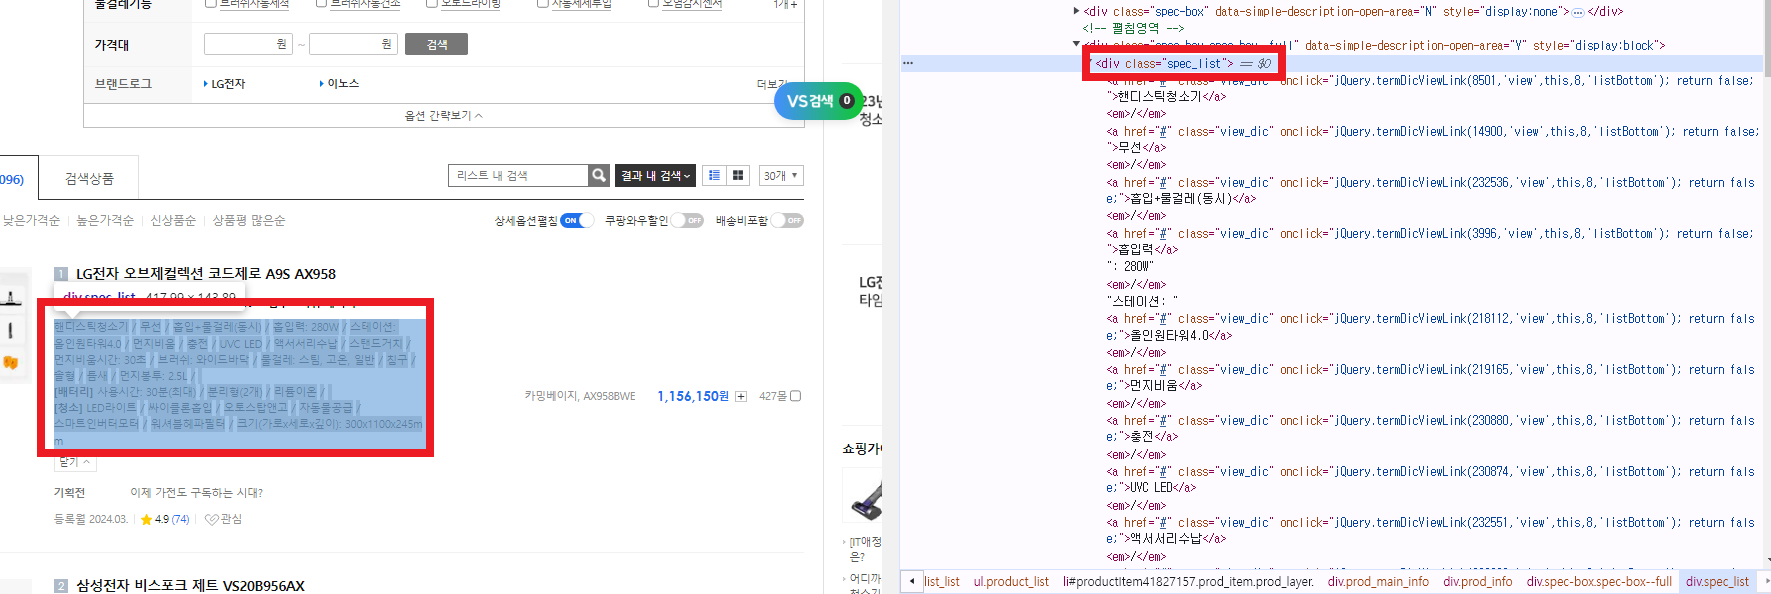

**가격 정보 가져오기**

In [ ]:
# 다나와에서는 동일한 모델이라도 옵션별로 다양한 가격이 조회됩니다.
# 이 가운데 1위 가격을 가져오기 위해 1위 옵션 태그의 위치를 살펴보겠습니다.

In [ ]:
# 스펙 목록 가져오기
# <div class='spec_list'> 태그에 스펙 목록 정보가 들어있습니다.
spec_list=prod_items[0].select('div.prod_pricelist')[0].text
print(spec_list)





VS검색 담고 스펙 비교하기닫기 
					427몰
					VS검색





1,156,120원
						

가격정보 더보기







카밍베이지, AX958BWE 








In [ ]:
# 스펙 목록 가져오기
# <div class='spec_list'> 태그에 스펙 목록 정보가 들어있습니다.
spec_list=prod_items[0].select('p.price_sect>a')[0].text.strip()
print(spec_list)

spec_list1=prod_items[1].select('p.price_sect>a')[0].text.strip()
print(spec_list1)

1,156,120원
478,930원


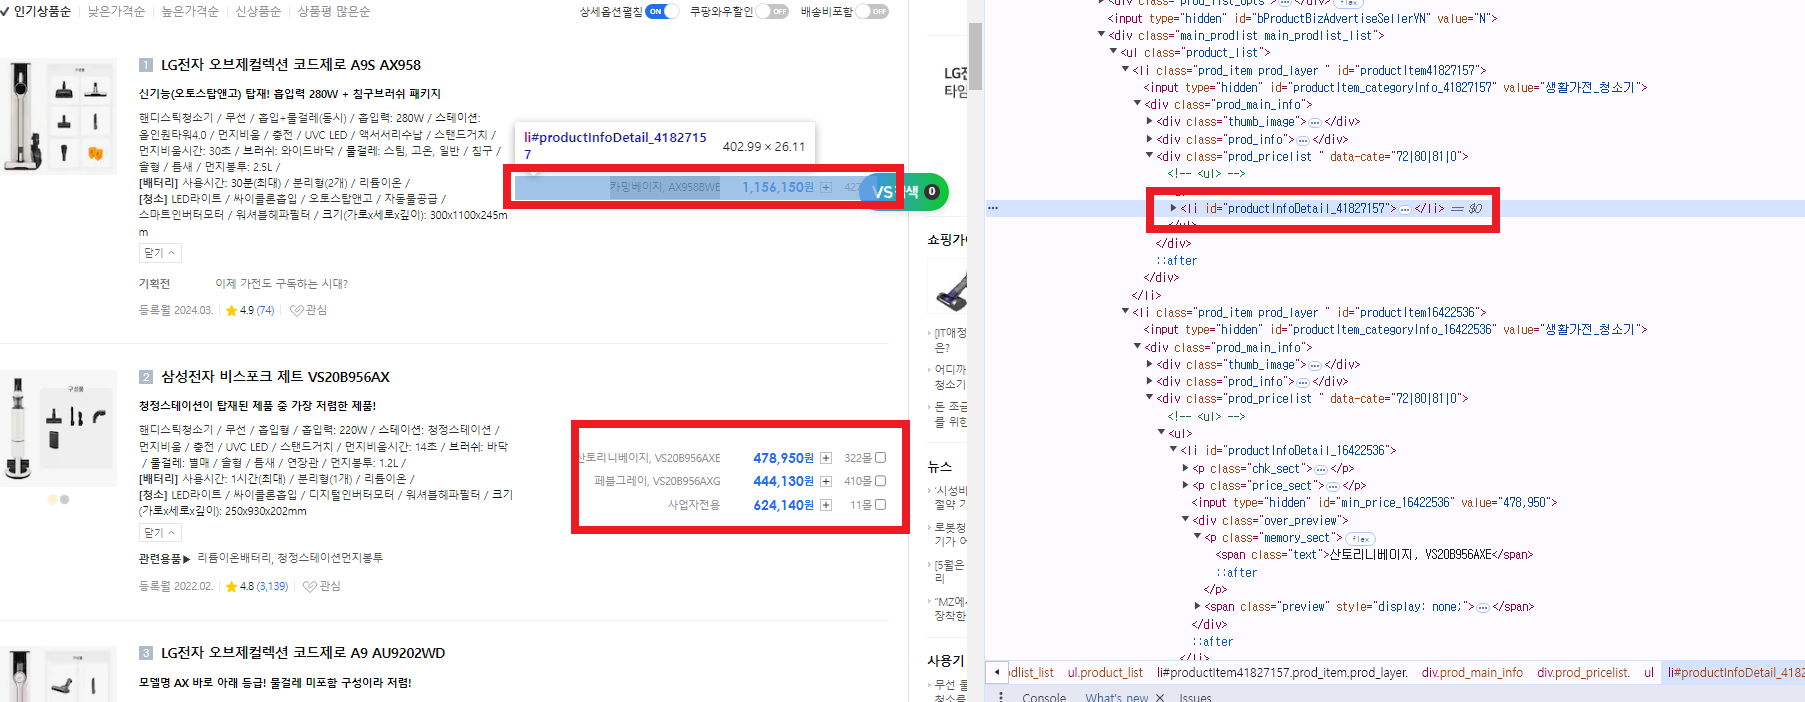

In [ ]:
# 반복문으로 검색 결과의 1페이지에 대한 상품 정보 추출
prod_data=[]
for prod_item in prod_items[1]:
  try: # 상품명 가져오기
    title=prod_item.select('p.prod_name>a')[0].text.strip()
  except:
    title=''

  try: # 스펙 목록 가져오기
    spec_list=prod_item.select('div.spec_list')[0].text.strip()
  except:
    sepc_list=''


  prod_data.append([title, spec_list])

print(len(prod_data))
print(prod_data)

5
[['', '1,156,120원'], ['', '1,156,120원'], ['', '1,156,120원'], ['삼성전자 비스포크 제트 VS20B956AX', '핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 청정스테이션/먼지비움/충전/UVC LED/스탠드거치/먼지비움시간: 14초/브러쉬: 바닥/물걸레: 별매/솔형/틈새/연장관/먼지봉투: 1.2L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] LED라이트/싸이클론흡입/디지털인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 250x930x202mm'], ['', '핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 청정스테이션/먼지비움/충전/UVC LED/스탠드거치/먼지비움시간: 14초/브러쉬: 바닥/물걸레: 별매/솔형/틈새/연장관/먼지봉투: 1.2L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] LED라이트/싸이클론흡입/디지털인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 250x930x202mm']]


In [ ]:
prod_data=[]
for prod_item in prod_items[0:30]:
  try: # 상품명 가져오기
    title=prod_item.select('p.prod_name>a')[0].text.strip()
   # print('title값:',title)
  except:
    title=''

  try: # 스펙 목록 가져오기
    spec_list=prod_item.select('div.spec_list')[0].text.strip()
  except:
    spec_list=''

  try: # 가격 정보 가져오기
    price=prod_items[0].select('p.price_sect>a')[0].text.strip()
  except:
    price=0
  prod_data.append([title, spec_list, price])

print(len(prod_data))
print(prod_data)

# 검색 결과의 1페이지에 존재하는 총 30개의 결과가 잘 정리 된 것을 확인할 수 있습니다.
# 상품별로 수집할 정보(상품명, 스펙 목록, 가격)의 값이 없는 경우가 존재할 수도 있으므로 try/except 구문 활용.

30
[['LG전자 오브제컬렉션 코드제로 A9S AX958', '핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 280W/스테이션: 올인원타워4.0/먼지비움/충전/UVC LED/액서서리수납/스탠드거치/먼지비움시간: 30초/브러쉬: 와이드바닥/물걸레: 스팀, 고온, 일반/침구/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 30분(최대)/분리형(2개)/리튬이온/[청소] LED라이트/싸이클론흡입/오토스탑앤고/자동물공급/스마트인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 300x1100x245mm', '1,156,120원'], ['삼성전자 비스포크 제트 VS20B956AX', '핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 청정스테이션/먼지비움/충전/UVC LED/스탠드거치/먼지비움시간: 14초/브러쉬: 바닥/물걸레: 별매/솔형/틈새/연장관/먼지봉투: 1.2L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] LED라이트/싸이클론흡입/디지털인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 250x930x202mm', '1,156,120원'], ['LG전자 오브제컬렉션 코드제로 A9 AU9202WD', '핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 올인원타워/먼지비움/충전/액서서리수납/스탠드거치/먼지비움시간: 60초/브러쉬: 바닥/물걸레: 별매/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] 싸이클론흡입/스마트인버터모터/헤파필터/크기(가로x세로x깊이): 250x1120x260mm', '1,156,120원'], ['LG전자 오브제컬렉션 코드제로 A9 AU9272WD', '핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 220W/스테이션: 올인원타워/먼지비움/충전/액서서리수납/스탠드거치/먼지비움시간: 60초/브러쉬: 바닥/물걸레: 일반/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] 싸이클론흡입/자동물공급/스마트인버터모터/워셔블

**상품 정보 태그에서 원하는 정보를 추출하는 함수**

In [ ]:
def get_prod_items(prod_items):
  prod_data=[]

  for prod_item in prod_items[0:30]:
    try: # 상품명 가져오기
      title=prod_item.select('p.prod_name>a')[0].text.strip()
    # print('title값:',title)
    except:
      title=''

    try: # 스펙 목록 가져오기
      spec_list=prod_item.select('div.spec_list')[0].text.strip()
    except:
      spec_list=''

    try: # 가격 정보 가져오기
      price=prod_items[0].select('p.price_sect>a')[0].text.strip()
    except:
      price=0
    prod_data.append([title, spec_list, price])

  print(len(prod_data))
  print(prod_data)

  return prod_data
# 각 상품의 수집 항목(상품명, 스펙 목록, 가격 정보)을 추출한 결과 리스트인 prod_data가 반환됩니다.

In [ ]:
prod_items=soup.select('div.main_prodlist>ul.product_list>li.prod_item')
prod_items

[<li class="prod_item prod_layer" id="productItem41827157">
 <input id="productItem_categoryInfo_41827157" type="hidden" value="생활가전_청소기"/>
 <div class="prod_main_info">
 <div class="thumb_image">
 <a class="thumb_link" href="https://prod.danawa.com/info/?pcode=41827157&amp;cate=102207" onmousedown="_trkEventLog('15상품리스트_상품이미지_상품블로그 이동');" target="_blank">
 <img alt="LG전자 오브제컬렉션 코드제로 A9S AX958이미지입니다. 누르면 해당 게시물로 새창이동합니다." src="//img.danawa.com/prod_img/500000/157/827/img/41827157_1.jpg?shrink=130:130&amp;_v=20240509152909"/>
 </a>
 <a class="btn_view_zoom" href="#" onclick="return false;"><span class="ico i_zoom_vw"></span>이미지보기</a>
 </div>
 <div class="prod_info">
 <p class="prod_name">
 <strong class="pop_rank"><span class="screen_out">인기 순위</span>1</strong> <a href="https://prod.danawa.com/info/?pcode=41827157&amp;cate=102207" name="productName" onmousedown="_trkEventLog('15상품리스트_상품명')" target="_blank">
 									LG전자 오브제컬렉션 코드제로 A9S AX958								</a>
 <span class="head_ico_wrap" st

In [ ]:
prod_data=get_prod_items(prod_items)
print(len(prod_data))

30
[['LG전자 오브제컬렉션 코드제로 A9S AX958', '핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 280W/스테이션: 올인원타워4.0/먼지비움/충전/UVC LED/액서서리수납/스탠드거치/먼지비움시간: 30초/브러쉬: 와이드바닥/물걸레: 스팀, 고온, 일반/침구/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 30분(최대)/분리형(2개)/리튬이온/[청소] LED라이트/싸이클론흡입/오토스탑앤고/자동물공급/스마트인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 300x1100x245mm', '1,156,120원'], ['삼성전자 비스포크 제트 VS20B956AX', '핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 청정스테이션/먼지비움/충전/UVC LED/스탠드거치/먼지비움시간: 14초/브러쉬: 바닥/물걸레: 별매/솔형/틈새/연장관/먼지봉투: 1.2L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] LED라이트/싸이클론흡입/디지털인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 250x930x202mm', '1,156,120원'], ['LG전자 오브제컬렉션 코드제로 A9 AU9202WD', '핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 올인원타워/먼지비움/충전/액서서리수납/스탠드거치/먼지비움시간: 60초/브러쉬: 바닥/물걸레: 별매/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] 싸이클론흡입/스마트인버터모터/헤파필터/크기(가로x세로x깊이): 250x1120x260mm', '1,156,120원'], ['LG전자 오브제컬렉션 코드제로 A9 AU9272WD', '핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 220W/스테이션: 올인원타워/먼지비움/충전/액서서리수납/스탠드거치/먼지비움시간: 60초/브러쉬: 바닥/물걸레: 일반/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] 싸이클론흡입/자동물공급/스마트인버터모터/워셔블

**데이터 수집: 여러 페이지에 걸친 다나와 검색 페이지 크롤링**

In [ ]:
# 이번 절에서는 이 함수와 반복문을 이용해 전체 페이지의 상품 정보 데이터를 수집.
# 다나와는 page가 url에 따라 달라지지 않게 바뀌어서 네이버 쇼핑으로 변경

# page1) pagingIndex=1: 페이지수
# https://search.shopping.naver.com/search/all?adQuery=무선청소기&origQuery=무선청소기&pagingIndex=1&pagingSize=40&productSet=total&query=무선청소기&sort=rel&timestamp=&viewType=list

# page2)
# https://search.shopping.naver.com/search/all?adQuery=무선청소기&origQuery=무선청소기&pagingIndex=2&pagingSize=40&productSet=total&query=무선청소기&sort=rel&timestamp=&viewType=list

# page3)
# https://search.shopping.naver.com/search/all?adQuery=무선청소&origQuery=무선청소기&pagingIndex=3&pagingSize=40&productSet=total&query=무선청소&sort=rel&timestamp=&viewType=list

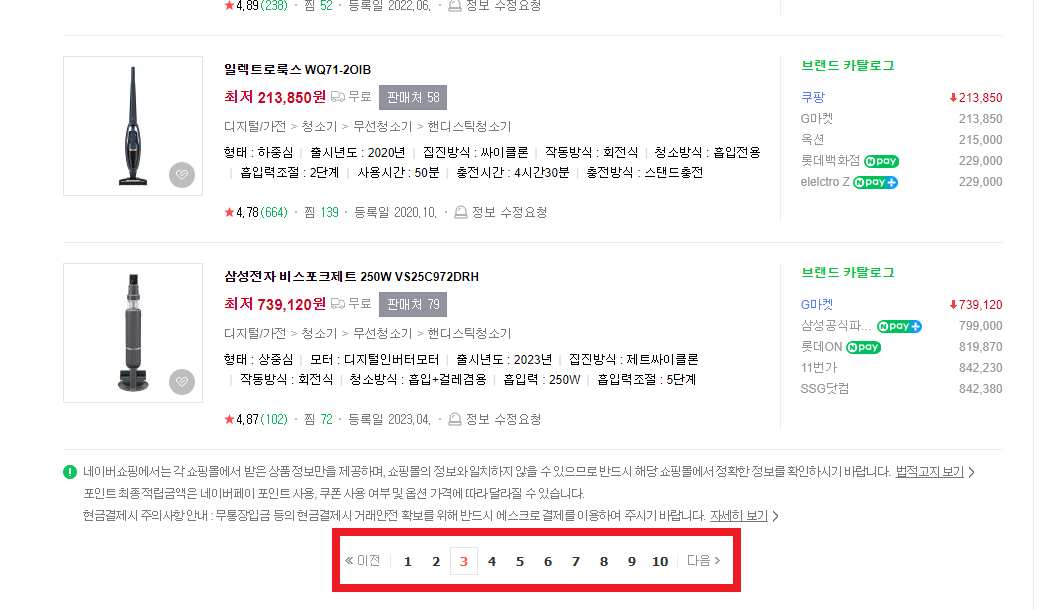

In [ ]:
# 가장 중요한 값: query, page
# 이 두 파라미터 값을 달리해서 변경하면 원하는 검색 페이지를 요청할 수 있습니다.
# 검색어와 페이지 정보만 변경해서 다음과 같은 URL을 만들어서 웹 브라우저로 페이지를 열어서 호출할 수 있다면 여러 페이지를 가져오도록 처리할 수 있을 것입니다.

# ex) http://search.danawa.com/dsearch.php?query={검색어}&volumeType=allvs&page={페이지}&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods
# '무선청소기'로 검색한 결과 페이지를 for문을 통해 차례차례 변경하면서, 처리할 수 있다면 간간하게 여러 페이지를 크롤링할 수 있을 것입니다.

In [ ]:
def get_search_page_url(page):
  return 'https://search.shopping.naver.com/search/all?adQuery=무선청소기&origQuery=무선청소기&pagingIndex={}&pagingSize=40&productSet=total&query=무선청소&sort=rel&timestamp=&viewType=list'.format(page)

page=1
url=get_search_page_url(page)
# print(url)

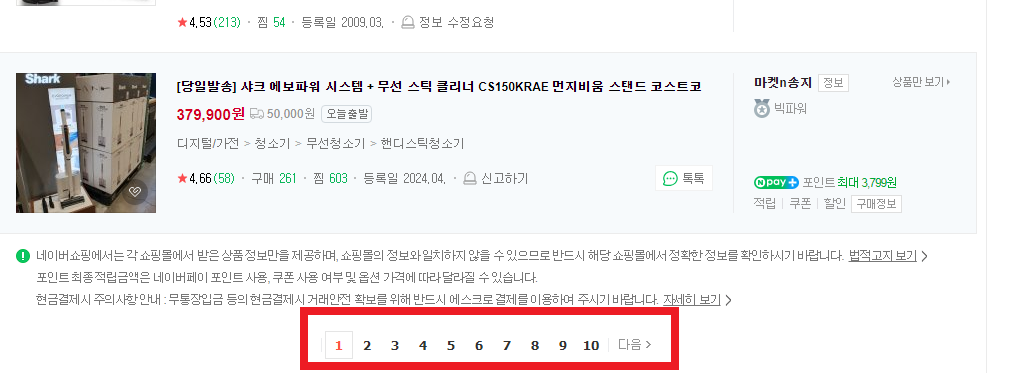

In [ ]:
def get_search_page_url(page):
  return 'https://search.shopping.naver.com/search/all?adQuery=무선청소기&origQuery=무선청소%B8%B0&pagingIndex={}&pagingSize=40&productSet=total&query=무선청소기&sort=rel&timestamp=&viewType=list'.format(page)

page=2
url=get_search_page_url(page)
# print(url)

# 여러 페이지를 크롤링할 때는 페이지 URL을 변경해 가며, 페이지별 정보를 수집하고 병합하는 과정을 반복하면 됩니다.

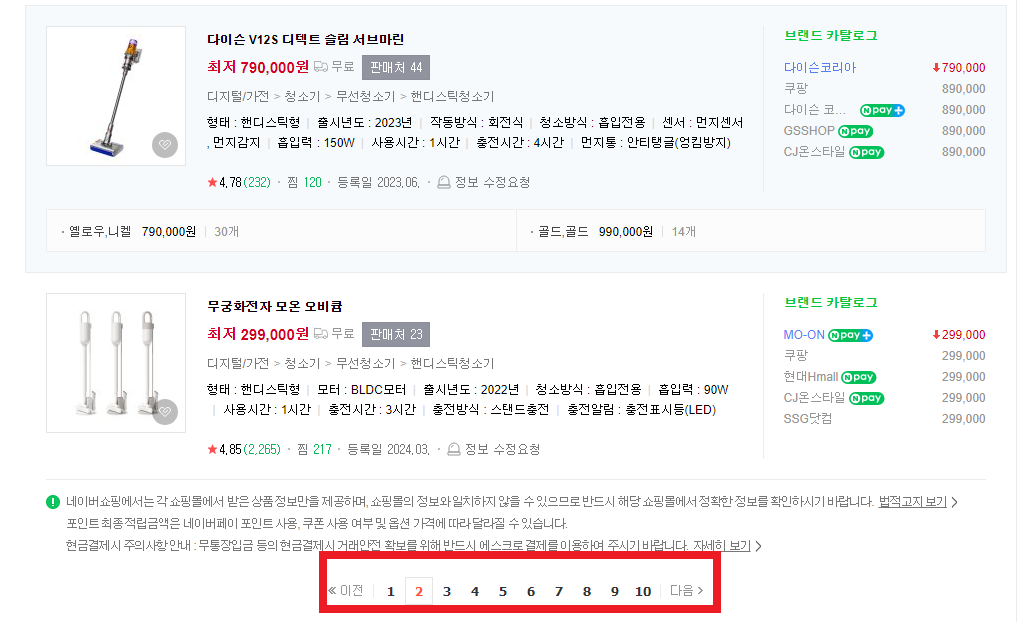

**진행표시줄 처리**

In [ ]:
# 페이지별 URL을 이용해 반복문으로 전체 페이지의 상품 정보를 크롤링할 수 있습니다.
# 반복문을 실행하기에 앞서 tqdm 라이브러리를 이용해 현재 진행 상황을 표시하는 진행 표시줄을 만들어보겠습니다.
# tqdm 모듈을 이용하면 전체 과정 중 현재 진행 단계, 지금까지의 소요 시간, 1회 작업 시 소요시간, 예상 완료시간 등을 확인할 수 있슶니다.

! pip install tqdm
# 반복문 하나를 실행하는 것이 iteration이 하나 진행됐다고 하며, 현재 진행 상태를 확인할 수 있습니다.

In [ ]:
import time
from tqdm import tqdm_notebook

total_page=10
for page in tqdm_notebook(range(1,total_page+1)):
  time.sleep(5) # 페이지가 로딩 완료되기 위한 시간을 5초로 준다.

<ipython-input-31-d73230a74bae>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1,total_page+1)):


  0%|          | 0/10 [00:00<?, ?it/s]

**여러 페이지에 걸친 상품 정보 수집**

In [ ]:
url="https://prod.danawa.com/list/?cate=102207&shortcutKeyword=무선청소기"
driver.get(url)

html=driver.page_source
soup=BeautifulSoup(html, 'html.parser')

In [ ]:
prod_items=soup.select('li.prod_item')
len(prod_items)

31

In [ ]:
prod_items=soup.select('div.main_prodlist>ul.product_list>li.prod_item')
len(prod_items)

31

In [ ]:
title=prod_items[0].select('p.prod_name > a')[0].text.strip()
print(title)

LG전자 오브제컬렉션 코드제로 A9S AX958


In [ ]:
spec_list=prod_items[0].select('div.spec_list')[0].text.strip()
print(spec_list)

핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 280W/스테이션: 올인원타워4.0/먼지비움/충전/UVC LED/액서서리수납/스탠드거치/먼지비움시간: 30초/브러쉬: 와이드바닥/물걸레: 스팀, 고온, 일반/침구/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 30분(최대)/분리형(2개)/리튬이온/[청소] LED라이트/싸이클론흡입/오토스탑앤고/자동물공급/스마트인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 300x1100x245mm


In [ ]:
price=prod_items[0].select('p.price_sect>a')[0].text.strip()
print(price)

1,156,120원


In [ ]:
# 반복문으로 검색 결과의 1페이지에 대한 상품 정보 추출
prod_data=[]

for prod_item in prod_items[0:30]:
  try:
    title=prod_item.select('p.prod-name>a')[0].text.strip()
  except:
    title=''

  try:
    spec_list=prod_item.select('div.spec_list')[0].text.strip()
  except:
    spec_list=''

  try:
    price=prod_item.select('p.price_sect>a')[0].text.strip()
  except:
    price=0

  prod_data.append([title, spec_list, price])

print(len(prod_data))
print(prod_data)

30
[['', '핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 280W/스테이션: 올인원타워4.0/먼지비움/충전/UVC LED/액서서리수납/스탠드거치/먼지비움시간: 30초/브러쉬: 와이드바닥/물걸레: 스팀, 고온, 일반/침구/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 30분(최대)/분리형(2개)/리튬이온/[청소] LED라이트/싸이클론흡입/오토스탑앤고/자동물공급/스마트인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 300x1100x245mm', '1,156,120원'], ['', '핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 청정스테이션/먼지비움/충전/UVC LED/스탠드거치/먼지비움시간: 14초/브러쉬: 바닥/물걸레: 별매/솔형/틈새/연장관/먼지봉투: 1.2L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] LED라이트/싸이클론흡입/디지털인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 250x930x202mm', '478,930원'], ['', '핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 올인원타워/먼지비움/충전/액서서리수납/스탠드거치/먼지비움시간: 60초/브러쉬: 바닥/물걸레: 별매/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] 싸이클론흡입/스마트인버터모터/헤파필터/크기(가로x세로x깊이): 250x1120x260mm', '629,950원'], ['', '핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 220W/스테이션: 올인원타워/먼지비움/충전/액서서리수납/스탠드거치/먼지비움시간: 60초/브러쉬: 바닥/물걸레: 일반/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] 싸이클론흡입/자동물공급/스마트인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 250x1120x260mm', '695,610원'], ['', '핸디스틱청소기/무선/흡입형/흡입력: 151AW/충전/벽걸이거치/브러쉬: 바닥/펫/솔형/틈새/[배터

**상품 정보 태그에서 원하는 정보를 추출하는 함수**

In [ ]:
def get_prod_items(prod_items):
# 반복문으로 검색 결과의 1페이지에 대한 상품 정보 추출
  prod_data=[]

  for prod_item in prod_items[0:30]:
    try:
      title=prod_item.select('p.prod_name>a')[0].text.strip()
    except:
      title=''

    try:
      spec_list=prod_item.select('div.spec_list')[0].text.strip()
    except:
      spec_list=''

    try:
      price=prod_item.select('p.price_sect>a')[0].text.strip()
    except:
      price=0

    prod_data.append([title, spec_list, price])

  print(len(prod_data))
  print(prod_data)
  return prod_data

In [ ]:
prod_items=soup.select('div.main_prodlist >ul.product_list>li.prod_item')
prod_data=get_prod_items(prod_items)
print(len(prod_data))

30
[['', '핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 280W/스테이션: 올인원타워4.0/먼지비움/충전/UVC LED/액서서리수납/스탠드거치/먼지비움시간: 30초/브러쉬: 와이드바닥/물걸레: 스팀, 고온, 일반/침구/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 30분(최대)/분리형(2개)/리튬이온/[청소] LED라이트/싸이클론흡입/오토스탑앤고/자동물공급/스마트인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 300x1100x245mm', '1,156,120원'], ['', '핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 청정스테이션/먼지비움/충전/UVC LED/스탠드거치/먼지비움시간: 14초/브러쉬: 바닥/물걸레: 별매/솔형/틈새/연장관/먼지봉투: 1.2L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] LED라이트/싸이클론흡입/디지털인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 250x930x202mm', '478,930원'], ['', '핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 올인원타워/먼지비움/충전/액서서리수납/스탠드거치/먼지비움시간: 60초/브러쉬: 바닥/물걸레: 별매/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] 싸이클론흡입/스마트인버터모터/헤파필터/크기(가로x세로x깊이): 250x1120x260mm', '629,950원'], ['', '핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 220W/스테이션: 올인원타워/먼지비움/충전/액서서리수납/스탠드거치/먼지비움시간: 60초/브러쉬: 바닥/물걸레: 일반/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] 싸이클론흡입/자동물공급/스마트인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 250x1120x260mm', '695,610원'], ['', '핸디스틱청소기/무선/흡입형/흡입력: 151AW/충전/벽걸이거치/브러쉬: 바닥/펫/솔형/틈새/[배터

In [ ]:
prod_items

[<li class="prod_item prod_layer" id="productItem41827157">
 <input id="productItem_categoryInfo_41827157" type="hidden" value="생활가전_청소기"/>
 <div class="prod_main_info">
 <div class="thumb_image">
 <a class="thumb_link" href="https://prod.danawa.com/info/?pcode=41827157&amp;cate=102207" onmousedown="_trkEventLog('15상품리스트_상품이미지_상품블로그 이동');" target="_blank">
 <img alt="LG전자 오브제컬렉션 코드제로 A9S AX958이미지입니다. 누르면 해당 게시물로 새창이동합니다." src="//img.danawa.com/prod_img/500000/157/827/img/41827157_1.jpg?shrink=130:130&amp;_v=20240509152909"/>
 </a>
 <a class="btn_view_zoom" href="#" onclick="return false;"><span class="ico i_zoom_vw"></span>이미지보기</a>
 </div>
 <div class="prod_info">
 <p class="prod_name">
 <strong class="pop_rank"><span class="screen_out">인기 순위</span>1</strong> <a href="https://prod.danawa.com/info/?pcode=41827157&amp;cate=102207" name="productName" onmousedown="_trkEventLog('15상품리스트_상품명')" target="_blank">
 									LG전자 오브제컬렉션 코드제로 A9S AX958								</a>
 <span class="head_ico_wrap" st

**URL 변화**

In [ ]:
https://search.danawa.com/dsearch.php?query=무선청소기&tab=main

# 1페이지 진입 시 (최초 URL과 동일)
http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&pre-viousKeyword=EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0%&volumeType=allvs&page=1&limit=30&sort=saveDESC&list&-boost=true&addDelivery=N&tab=goods&tab=goods

# 2페이지 진입 시
http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&pre-viousKeyword=무선청소기&volumeType=allvs&page=2&limit=30&sort=saveDESC&list&-boost=true&addDelivery=N&tab=goods&tab=goods

http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소&pre-viousKeyword=무선청소기&volumeType=allvs&page=3&limit=30&sort=saveDESC&list&-boost=true&addDelivery=N&tab=goods&tab=goods


SyntaxError: invalid decimal literal (<ipython-input-42-a60eb4e5a436>, line 4)

In [ ]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
driver.implicitly_wait(3)
keyword='무선청소기'
total_page=10
prod_data_total=[]

In [ ]:
def get_search_page_url(keyword, total_page):
  return 'http://search.danawa.com/dsearch.php?query={}&originalQuery={}&pre-viousKeyword={}&volumeType=allvs&page={}&limit=30&sort=saveDESC&list&-boost=true&addDelivery=N&tab=goods&tab=goods'.format(keyword, keyword,keyword,page)

In [ ]:
for page in tqdm_notebook(range(1,total_page+1)):
  url=get_search_page_url(keyword, page)
  driver.get(url)
  # 페이지가 로딩 완료되기 위한 시간으로 5초를 할당
  # 페이지 URL을 생성하는 함수를 이용해 특정 페이지로 이동합니다.
  time.sleep(5)

  # 현재 페이지의 HTML 정보 가져오기
  html=driver.page_source
  soup=BeautifulSoup(html, 'html.parser')

  # 상품 정보 추출
  prod_items=soup.select('div#productListArea > div.main_prodlist > ul.product_list > li.prod_item')
  prod_item_list=get_prod_items(prod_items)

  # 추출 데이터 저장
  prod_data_total=prod_data_total+prod_item_list

<ipython-input-58-842c2d23d80d>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1,total_page+1)):


  0%|          | 0/10 [00:00<?, ?it/s]

30
[['LG전자 오브제컬렉션 코드제로 A9S AX958', '핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 280W/스테이션: 올인원타워4.0/먼지비움/충전/UVC LED/액서서리수납/스탠드거치/먼지비움시간: 30초/브러쉬: 와이드바닥/물걸레: 스팀, 고온, 일반/침구/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 30분(최대)/분리형(2개)/리튬이온/[청소] LED라이트/싸이클론흡입/오토스탑앤고/자동물공급/스마트인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 300x1100x245mm', '1,156,120원'], ['삼성전자 비스포크 제트 VS20B956AX', '핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 청정스테이션/먼지비움/충전/UVC LED/스탠드거치/먼지비움시간: 14초/브러쉬: 바닥/물걸레: 별매/솔형/틈새/연장관/먼지봉투: 1.2L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] LED라이트/싸이클론흡입/디지털인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 250x930x202mm', '478,930원'], ['LG전자 오브제컬렉션 코드제로 A9 AU9202WD', '핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 올인원타워/먼지비움/충전/액서서리수납/스탠드거치/먼지비움시간: 60초/브러쉬: 바닥/물걸레: 별매/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] 싸이클론흡입/스마트인버터모터/헤파필터/크기(가로x세로x깊이): 250x1120x260mm', '629,950원'], ['LG전자 오브제컬렉션 코드제로 A9 AU9272WD', '핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 220W/스테이션: 올인원타워/먼지비움/충전/액서서리수납/스탠드거치/먼지비움시간: 60초/브러쉬: 바닥/물걸레: 일반/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] 싸이클론흡입/자동물공급/스마트인버터모터/워셔블헤파필터

In [ ]:
prod_data_total

[['LG전자 오브제컬렉션 코드제로 A9S AX958',
  '핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 280W/스테이션: 올인원타워4.0/먼지비움/충전/UVC LED/액서서리수납/스탠드거치/먼지비움시간: 30초/브러쉬: 와이드바닥/물걸레: 스팀, 고온, 일반/침구/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 30분(최대)/분리형(2개)/리튬이온/[청소] LED라이트/싸이클론흡입/오토스탑앤고/자동물공급/스마트인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 300x1100x245mm',
  '1,156,120원'],
 ['삼성전자 비스포크 제트 VS20B956AX',
  '핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 청정스테이션/먼지비움/충전/UVC LED/스탠드거치/먼지비움시간: 14초/브러쉬: 바닥/물걸레: 별매/솔형/틈새/연장관/먼지봉투: 1.2L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] LED라이트/싸이클론흡입/디지털인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 250x930x202mm',
  '478,930원'],
 ['LG전자 오브제컬렉션 코드제로 A9 AU9202WD',
  '핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 올인원타워/먼지비움/충전/액서서리수납/스탠드거치/먼지비움시간: 60초/브러쉬: 바닥/물걸레: 별매/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] 싸이클론흡입/스마트인버터모터/헤파필터/크기(가로x세로x깊이): 250x1120x260mm',
  '629,950원'],
 ['LG전자 오브제컬렉션 코드제로 A9 AU9272WD',
  '핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 220W/스테이션: 올인원타워/먼지비움/충전/액서서리수납/스탠드거치/먼지비움시간: 60초/브러쉬: 바닥/물걸레: 일반/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 1시간(최대)/분리형(1개)/리튬이온/[청소] 싸이클론흡입/자동물공급/스마

**수집 데이터저장**

In [ ]:
import pandas as pd
data=pd.DataFrame(prod_data_total)
data.columns=['상품명','스펙 목록','가격']
data.to_excel('danawa_crawling_result.xlsx',index=False)

**다나와 크롤링 데이터 전처리**

In [ ]:
# 수집한 데이터를 분석에 용이하도록, 상품명 데이터에서 회사명과 제품명 분리
# 일반 문자열로 저장된 스펙 목록을 필요한 스펙으로 분류 및 단위 통합

**다나와 크롤링 데이터 불러오기**

In [ ]:
import pandas as pd
data=pd.read_excel('/content/danawa_crawling_result.xlsx')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     300 non-null    object
 1   스펙 목록   300 non-null    object
 2   가격      300 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB


,상품명,스펙 목록,가격
0,LG전자 오브제컬렉션 코드제로 A9S AX958,핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 280W/스테이션: 올인원타워4.0...,"1,156,120원"
1,삼성전자 비스포크 제트 VS20B956AX,핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 청정스테이션/먼지비움/충전/...,"478,930원"
2,LG전자 오브제컬렉션 코드제로 A9 AU9202WD,핸디스틱청소기/무선/흡입형/흡입력: 220W/스테이션: 올인원타워/먼지비움/충전/액...,"629,950원"
3,LG전자 오브제컬렉션 코드제로 A9 AU9272WD,핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 220W/스테이션: 올인원타워/먼지...,"695,610원"
4,다이슨 싸이클론 V10,핸디스틱청소기/무선/흡입형/흡입력: 151AW/충전/벽걸이거치/브러쉬: 바닥/펫/솔...,"399,000원"


In [ ]:
# 총 300개의 무선청소기 데이터를 가져왔음을 확인할 수 있고, 상품명, 스펙 목록은 문자열 타입(object)인데, 이는 보통 문자열 데이터일때 object 데이터 타입으로 표현.
# 가격은 숫자형 데이터 타입(int)으로 구성돼 있습니다.
# 가격은 모두 300개로서 모든 항목에 데이터가 잘 채워진 것을 확인할 수 있습니다.

**회사명, 모델명 정리**

In [ ]:
data['상품명'][:10]

0      LG전자 오브제컬렉션 코드제로 A9S AX958
1         삼성전자 비스포크 제트 VS20B956AX
2    LG전자 오브제컬렉션 코드제로 A9 AU9202WD
3    LG전자 오브제컬렉션 코드제로 A9 AU9272WD
4                    다이슨 싸이클론 V10
5                      샤오미 미홀 M22
6    LG전자 오브제컬렉션 코드제로 A9 AS9202WD
7     LG전자 오브제컬렉션 코드제로 A9S AX9984
8     LG전자 오브제컬렉션 코드제로 A9S AX947A
9     LG전자 오브제컬렉션 코드제로 A9S AX958A
Name: 상품명, dtype: object

In [ ]:
title="LG전자 오브제컬렉션 코드제로 A9 AX9984"
info=title.split(' ',1)
print(info)
# split() 함수: 특정 문자를 기준으로 문자열을 나누는 함수.
# split(' ', 1): 1= 첫번째 공백에 대해서만 구분하게 합니다.

['LG전자', '오브제컬렉션 코드제로 A9 AX9984']


**회사명+모델명 분리**

In [ ]:
company_list=[]
product_list=[]

for title in data['상품명']:
  title_info=title.split(' ',1)
  company_name=title_info[0]
  product_name=title_info[1]

  company_list.append(company_name)
  product_list.append(product_name)

In [ ]:
print('len(data):', len(data))
print('len(company_list):',len(company_list))

len(data): 300
len(company_list): 300


In [ ]:
print('company_list[:5]:',company_list[:5])
print('len(product_list):', len(product_list))

company_list[:5]: ['LG전자', '삼성전자', 'LG전자', 'LG전자', '다이슨']
len(product_list): 300


In [ ]:
print('product_list[:5]:',product_list[:5])

# 코드를 실행해 보니 300개의 회사명(company_list)과 제품명(product_list)이 잘 분류된 것을 확인할 수 있습니다.

product_list[:5]: ['오브제컬렉션 코드제로 A9S AX958', '비스포크 제트 VS20B956AX', '오브제컬렉션 코드제로 A9 AU9202WD', '오브제컬렉션 코드제로 A9 AU9272WD', '싸이클론 V10']


**스펙 목록 데이터 살펴보기**

In [ ]:
data['스펙 목록'][0]

'핸디스틱청소기/무선/흡입+물걸레(동시)/흡입력: 280W/스테이션: 올인원타워4.0/먼지비움/충전/UVC LED/액서서리수납/스탠드거치/먼지비움시간: 30초/브러쉬: 와이드바닥/물걸레: 스팀, 고온, 일반/침구/솔형/틈새/먼지봉투: 2.5L/[배터리] 사용시간: 30분(최대)/분리형(2개)/리튬이온/[청소] LED라이트/싸이클론흡입/오토스탑앤고/자동물공급/스마트인버터모터/워셔블헤파필터/크기(가로x세로x깊이): 300x1100x245mm'

In [ ]:
# 결과를 보면 각 사양 정보가 앞뒤에 공백이 있는 슬래시 "/"로 구분돼 있습니다.
print(data['스펙 목록'][0].split('/'))

['핸디스틱청소기', '무선', '흡입+물걸레(동시)', '흡입력: 280W', '스테이션: 올인원타워4.0', '먼지비움', '충전', 'UVC LED', '액서서리수납', '스탠드거치', '먼지비움시간: 30초', '브러쉬: 와이드바닥', '물걸레: 스팀, 고온, 일반', '침구', '솔형', '틈새', '먼지봉투: 2.5L', '[배터리] 사용시간: 30분(최대)', '분리형(2개)', '리튬이온', '[청소] LED라이트', '싸이클론흡입', '오토스탑앤고', '자동물공급', '스마트인버터모터', '워셔블헤파필터', '크기(가로x세로x깊이): 300x1100x245mm']


In [ ]:
# 분리 된 스펙에는 제품의 카테고리, 유/무선 여부, 필터 종류, 흡입력, 충전 시간, 사용시간 등이 포함돼 있습니다.

In [ ]:
# 각 제품별 스펙 목록이 통일성 있게 순서대로 언급돼 있으면 정리하기가 수월하겠지만, 제품마다 특징이 모두 다르기 때문에 이중에서 분석에 필요한 정보만 추출하는 과정이 필요하다.